### Importación de datos



In [44]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.tail()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
2358,Smartwatch,Electrónicos,195000.0,8600.0,18/06/2022,Felipe Santos,Cali,4,Tarjeta de crédito,1,3.43722,-76.52250


#1. Análisis de facturación



Se calcula el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [45]:
ingreso_tienda1 = float(tienda["Precio"].sum())
ingreso_tienda2 = float(tienda2["Precio"].sum())
ingreso_tienda3 = float(tienda3["Precio"].sum())
ingreso_tienda4 = float(tienda4["Precio"].sum())

print(ingreso_tienda1)
print(ingreso_tienda2)
print(ingreso_tienda3)
print(ingreso_tienda4)

1150880400.0
1116343500.0
1098019600.0
1038375700.0


In [46]:
print("Número de ventas en la tienda 1: ", tienda.shape[0])
print("Número de ventas en la tienda 2: ", tienda2.shape[0])
print("Número de ventas en la tienda 3: ", tienda3.shape[0])
print("Número de ventas en la tienda 4: ", tienda4.shape[0])

Número de ventas en la tienda 1:  2359
Número de ventas en la tienda 2:  2359
Número de ventas en la tienda 3:  2359
Número de ventas en la tienda 4:  2358


# 2. Ventas por categoría

En este caso buscamos hallar la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

* ***Tienda 1***

In [47]:
tienda.groupby("Categoría del Producto").size().sort_values(ascending = False).head()

,0
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284


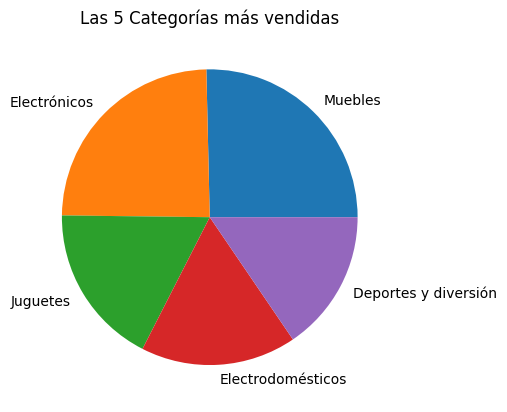

In [48]:
categoriasMasVendidas = tienda.groupby("Categoría del Producto").size().sort_values(ascending = False).head()
plt.pie(categoriasMasVendidas, labels = categoriasMasVendidas.reset_index()["Categoría del Producto"])
plt.title("Las 5 Categorías más vendidas")
plt.show()

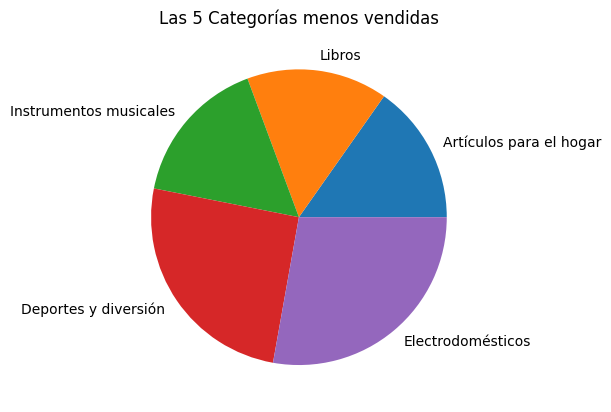

In [49]:
categoriasMenosVendidas = tienda.groupby("Categoría del Producto").size().sort_values().head()
plt.pie(categoriasMenosVendidas, labels = categoriasMenosVendidas.reset_index()["Categoría del Producto"])
plt.title("Las 5 Categorías menos vendidas")
plt.show()

* ***Tienda 2***

In [50]:
tienda2.groupby("Categoría del Producto").size().sort_values(ascending = False).head()

,0
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275


* ***Tienda 3***

In [51]:
tienda3.groupby("Categoría del Producto").size().sort_values(ascending = False).head()

,0
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277


* ***Tienda 4***

In [52]:
tienda4.groupby("Categoría del Producto").size().sort_values(ascending = False).head()

,0
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254


# 3. Calificación promedio de la tienda


Luego calculamos las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [53]:
calificar = tienda.groupby("Calificación").size().reset_index().rename(columns = {0: "Cantidad de Personas"})
calificar

,Calificación,Cantidad de Personas
0,1,319
1,2,86
2,3,218
3,4,444
4,5,1292


Text(0.5, 1.0, 'Puntuación')

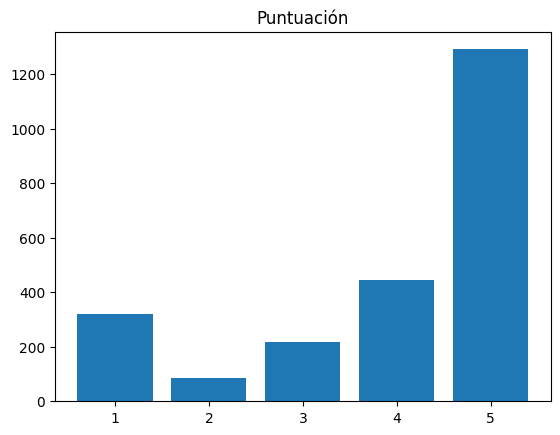

In [54]:
plt.bar(calificar["Calificación"], calificar["Cantidad de Personas"])
plt.title("Puntuación")

In [55]:
tienda2.groupby("Calificación").size().reset_index().rename(columns = {0: "Cantidad de Personas"})

,Calificación,Cantidad de Personas
0,1,273
1,2,93
2,3,209
3,4,482
4,5,1302


In [56]:
tienda3.groupby("Calificación").size().reset_index().rename(columns = {0: "Cantidad de Personas"})

,Calificación,Cantidad de Personas
0,1,297
1,2,79
2,3,193
3,4,434
4,5,1356


In [57]:
tienda4.groupby("Calificación").size().reset_index().rename(columns = {0: "Cantidad de Personas"})

,Calificación,Cantidad de Personas
0,1,310
1,2,85
2,3,210
3,4,453
4,5,1300


Finalmente conocemos las calificaciones promedio por cada tienda.

In [58]:
print("Calificación tienda1: ", round((tienda["Calificación"].mean()),2))
print("Calificación tienda2: ", round((tienda2["Calificación"].mean()),2))
print("Calificación tienda3: ", round((tienda3["Calificación"].mean()),2))
print("Calificación tienda4: ", round((tienda4["Calificación"].mean()),2))

Calificación tienda1:  3.98
Calificación tienda2:  4.04
Calificación tienda3:  4.05
Calificación tienda4:  4.0


# 4. Productos más y menos vendidos

Luego, queremos saber cuáles fueron los productos más y menos vendidos

In [59]:
display(tienda.groupby("Producto").size().sort_values(ascending = False).head(5))
display(tienda.groupby("Producto").size().sort_values().head(5))

,0
Producto,
Armario,60
TV LED UHD 4K,60
Microondas,60
Secadora de ropa,58
Mesa de noche,56


,0
Producto,
Auriculares con micrófono,33
Celular ABXY,33
Olla de presión,35
Pandereta,36
Ciencia de datos con Python,39


In [60]:
display(tienda2.groupby("Producto").size().sort_values(ascending = False).head(5))
display(tienda2.groupby("Producto").size().sort_values().head(5))

,0
Producto,
Iniciando en programación,65
Microondas,62
Batería,61
Pandereta,58
Guitarra acústica,58


,0
Producto,
Juego de mesa,32
Impresora,34
Mesa de comedor,34
Sillón,35
Auriculares,37


In [61]:
display(tienda3.groupby("Producto").size().sort_values(ascending = False).head(5))
display(tienda3.groupby("Producto").size().sort_values().head(5))

,0
Producto,
Kit de bancas,57
Mesa de comedor,56
Cama king,56
Set de ollas,55
Mesa de noche,55


,0
Producto,
Bloques de construcción,35
Set de vasos,36
Mochila,36
Microondas,36
Vaso térmico,38


In [62]:
display(tienda4.groupby("Producto").size().sort_values(ascending = False).head(5))
display(tienda4.groupby("Producto").size().sort_values().head(5))

,0
Producto,
Cama box,62
Cubertería,59
Cama king,56
Dashboards con Power BI,56
Carrito de control remoto,55


,0
Producto,
Guitarra eléctrica,33
Armario,34
Guitarra acústica,37
Ciencia de datos con Python,38
Lavadora de ropa,38


# 5. Envío promedio por tienda

Luego, es necesario calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [63]:
envio_tienda1 = round((tienda["Costo de envío"].mean()),2)
envio_tienda2 = round((tienda2["Costo de envío"].mean()),2)
envio_tienda3 =  round((tienda3["Costo de envío"].mean()),2)
envio_tienda4 = round((tienda4["Costo de envío"].mean()),2)



print("Costo de envío en tienda1: $", envio_tienda1)
print("Costo de envío en tienda2: $", envio_tienda2)
print("Costo de envío en tienda3: $", envio_tienda3)
print("costo de envío en tienda4: $", envio_tienda4)

Costo de envío en tienda1: $ 26018.61
Costo de envío en tienda2: $ 25216.24
Costo de envío en tienda3: $ 24805.68
costo de envío en tienda4: $ 23459.46


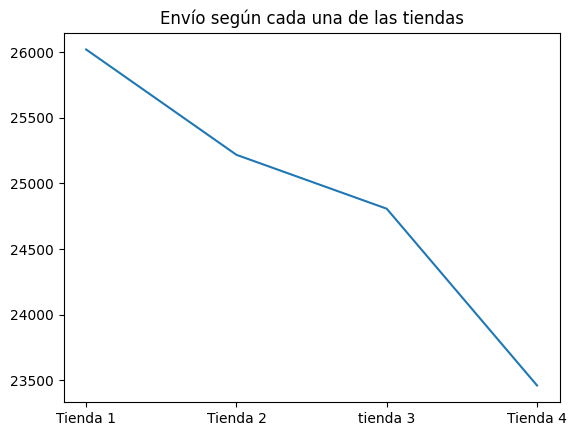

In [64]:
envio = [envio_tienda1, envio_tienda2, envio_tienda3, envio_tienda4]
tienda = ["Tienda 1", "Tienda 2", "tienda 3", "Tienda 4"]

plt.plot(tienda, envio)
plt.title("Envío según cada una de las tiendas")
plt.show()

# Análisis

En este proyecto se busca analizar cuál de las cuatro tiendas resulta menos rentable, para ello se analizan puntos como los ingresos totales de las tiendas,
las categorías de productos más y menos vendidas, las calificaciones promedio de los clientes por tienda y el coste de envío promedio para cada tienda, entre otros.

En primer lugar, la tienda 1 es la que presenta mas ingresos respecto a las demás, con un valor de *1150880400*. Mientras que la que menos recaudó fue la tienda 4, juntado exactamente *1038375700*.

En cuanto a la reputación de cada tienda, la tienda 1 obtuvo la menor puntuación en promedio por cada producto envíado, y la tienda 3 fue la mejor puntuada por los clientes. Asimismo, las categorías de Muebles, Electrónicos y Juguetes fueron las que mas vendieron por igual en cada una de las tiendas.

El promedio, las tiendas han realizado la misma cantidad de ventas, la tienda 1 es la que ha logrado obtener más recaudaciones, pero también es la que ha obtenido una peor puntuación, pero aquello no es relevante ya que las demás puntuaciones de las otras tiendas son muy similares a aquella.

Luego, como se observa en el gráfico final se comprende que, en la tienda 1, los gastos de envío son muchos más altos en comparación a las demás tiendas. Pero este gasto de envío es compensando por los ingresos que esta tienda genera. Para verificar esta hipótesis, calculo la influencia que tiene el gasto de envío respecto a la recaudación de las compras en cada una de las tienda.

In [65]:
# Relación entre los gatos de envío y la ganancia de cada una de las tiendas.
print(envio_tienda1/ingreso_tienda1)
print(envio_tienda2/ingreso_tienda2)
print(envio_tienda3/ingreso_tienda3)
print(envio_tienda4/ingreso_tienda4)

2.2607570691098747e-05
2.258824456809217e-05
2.2591290720129222e-05
2.2592458587002756e-05


Como se observa el gasto de envío es muy similar en proporción en cada una de las tiendas. Por lo cual el factor relevante para elegir una de las tiendas debe ser la ganancia recaudada, siendo la mejor la tienda 1 y la de peor rendimiento de ellas la tienda 4.